<a href="https://colab.research.google.com/github/amanjeetsahu/Credit-Card-Fraud-Detection/blob/master/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

# Problem Statement

*Financial fraud is a growing concern with far reaching consequences in the government, corporate organizations, finance industry, In Today’s world high dependency on internet technology has enjoyed increased credit card transactions but credit card fraud had also accelerated as online and offline
transaction. As credit card transactions become a widespread mode of payment, focus has been given to recent computational methodologies to handle the credit
card fraud problem. There are many fraud detection solutions and software which prevent frauds in businesses such as credit card, retail, e-commerce, insurance, and industries. Data mining technique is one notable and popular methods used in solving credit fraud detection problem. It is impossible to be
sheer certain about the true intention and rightfulness behind an application or transaction. In reality, to seek out possible evidences of fraud from the available
data using mathematical algorithms is the best effective option. Fraud detection in credit card is the truly the process of identifying those transactions that are
fraudulent into two classes of legit class and fraud class transactions, several techniques are designed and implemented to solve to credit card fraud detection
such as genetic algorithm, artificial neural network frequent item set mining, machine learning algorithms, migrating birds optimization algorithm,
comparative analysis of logistic regression, SVM, decision tree and random forest is carried out. Credit card fraud detection is a very popular but also a
difficult problem to solve. Firstly, due to issue of having only a limited amount of data, credit card makes it challenging to match a pattern for dataset. Secondly,
there can be many entries in dataset with truncations of fraudsters which also will fit a pattern of legitimate behavior. *

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe
import warnings
warnings.filterwarnings('ignore') # remove warnings from the notebook

In [2]:
import keras

Using TensorFlow backend.


In [0]:
np.random.seed(2)

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title creditcard.csv, id 10AxvM5EvduHGUpKxe07Y4KfkbfYzlhBL
title 311_Service_Requests_from_2010_to_Present.csv, id 1E1kLsgacvAbjHeaV6WHr2-ggdo9Hd0WQ


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': '10AxvM5EvduHGUpKxe07Y4KfkbfYzlhBL'})

In [0]:
downloaded.GetContentFile('creditcard.csv')

In [8]:
!ls

adc.json  creditcard.csv  sample_data


In [0]:
data = pd.read_csv('creditcard.csv')

## Data exploration

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
data.shape

(284807, 31)

## Pre-processing

In [0]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [14]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [0]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [16]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [17]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [19]:
X_train.shape

(199364, 29)

In [20]:
X_test.shape

(85443, 29)

In [0]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep neural network

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [23]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


## Training

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
199364/199364 [==============================] - 82s 414us/step - loss: 0.0100 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 82s 411us/step - loss: 0.0040 - acc: 0.9993
Epoch 3/5
199364/199364 [==============================] - 87s 437us/step - loss: 0.0036 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 80s 401us/step - loss: 0.0035 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 80s 401us/step - loss: 0.0032 - acc: 0.9994


In [26]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 5s 54us/step


In [27]:
print(score)

[0.004332358723307133, 0.9994148145547324]


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    ax.grid(False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [0]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

Confusion matrix, without normalization
[[85279    17]
 [   33   114]]


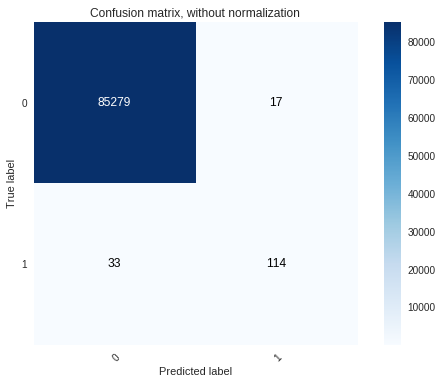

In [30]:
plot_confusion_matrix(y_test.values.ravel(), y_pred.round().astype('int').ravel(), classes= y['Class'].unique())
plt.show()

In [0]:
y_pred = model.predict(X)

Confusion matrix, without normalization
[[284255     60]
 [   111    381]]


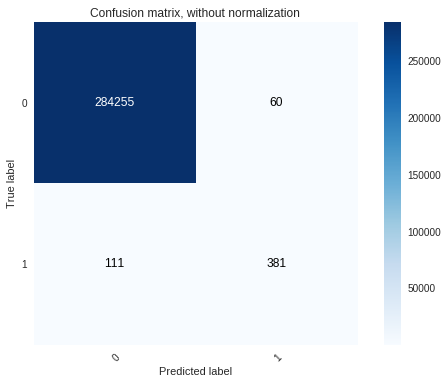

In [32]:
plot_confusion_matrix(y['Class'].values.ravel(), y_pred.round().astype('int').ravel(), classes= y['Class'].unique())
plt.show()

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
random_forest = RandomForestClassifier(n_estimators=100)

In [35]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
y_pred = random_forest.predict(X_test)

In [37]:
random_forest.score(X_test,y_test)

0.9995084442259752

Confusion matrix, without normalization
[[85289     7]
 [   35   112]]


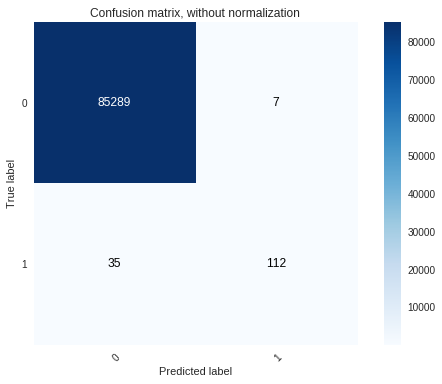

In [38]:
plot_confusion_matrix(y_test.values.ravel(), y_pred.round().astype('int').ravel(), classes= y['Class'].unique())
plt.show()

## Decision trees

In [0]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [40]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
y_pred = decision_tree.predict(X_test)

In [42]:
decision_tree.score(X_test,y_test)

0.9992275552122467

In [0]:
y_pred = decision_tree.predict(X_test)

Confusion matrix, without normalization
[[85266    30]
 [   36   111]]


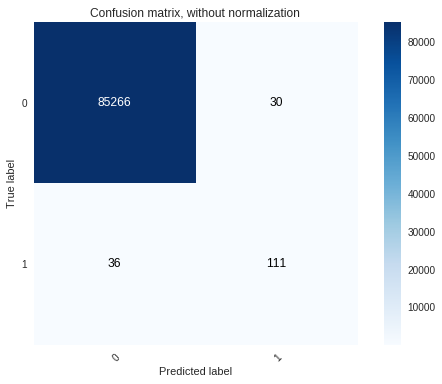

In [44]:
plot_confusion_matrix(y_test.values.ravel(), y_pred.round().astype('int').ravel(), classes= y['Class'].unique())
plt.show()

In [0]:
y_pred = decision_tree.predict(X)

Confusion matrix, without normalization
[[284285     30]
 [    36    456]]


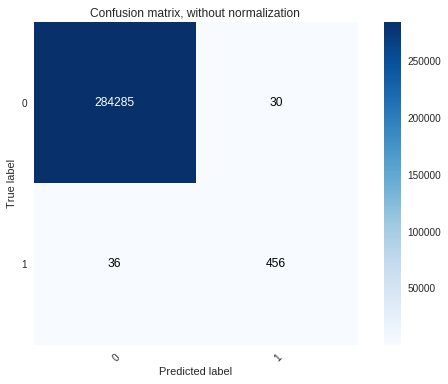

In [46]:
plot_confusion_matrix(y['Class'].values.ravel(), y_pred.round().astype('int').ravel(), classes= y['Class'].unique())
plt.show()

## Undersampling

In [47]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [0]:
normal_indices = data[data.Class == 0].index

In [49]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [50]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [0]:
under_sample_data = data.iloc[under_sample_indices,:]

In [0]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [0]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
688/688 [==============================] - 1s 917us/step - loss: 0.6349 - acc: 0.8983
Epoch 2/5
688/688 [==============================] - 0s 432us/step - loss: 0.2473 - acc: 0.9273
Epoch 3/5
688/688 [==============================] - 0s 408us/step - loss: 0.1844 - acc: 0.9331
Epoch 4/5
688/688 [==============================] - 0s 416us/step - loss: 0.1691 - acc: 0.9390
Epoch 5/5
688/688 [==============================] - 0s 435us/step - loss: 0.1493 - acc: 0.9433


In [0]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization
[[147   0]
 [ 19 130]]


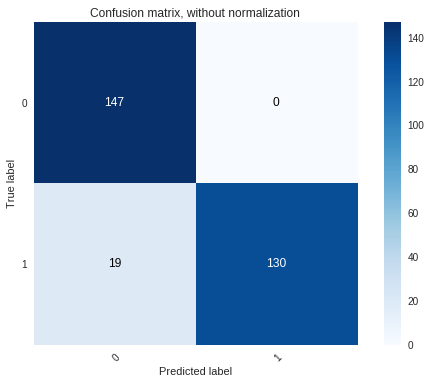

In [58]:
plot_confusion_matrix(y_test.ravel(), y_pred.round().astype('int').ravel(), classes= y['Class'].unique())
plt.show()

Confusion matrix, without normalization
[[283877    438]
 [    57    435]]


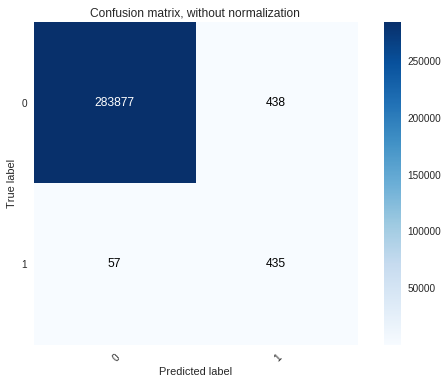

In [59]:
y_pred = model.predict(X)
plot_confusion_matrix(y['Class'].values.ravel(), y_pred.round().astype('int').ravel(), classes= y['Class'].unique())
plt.show()

## SMOTE

In [60]:
%%bash
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.4.3)


In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [0]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [0]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [66]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
398041/398041 [==============================] - 161s 405us/step - loss: 0.0336 - acc: 0.9887
Epoch 2/5
398041/398041 [==============================] - 160s 402us/step - loss: 0.0143 - acc: 0.9963
Epoch 3/5
398041/398041 [==============================] - 162s 406us/step - loss: 0.0112 - acc: 0.9972
Epoch 4/5
398041/398041 [==============================] - 158s 397us/step - loss: 0.0098 - acc: 0.9976
Epoch 5/5
398041/398041 [==============================] - 160s 401us/step - loss: 0.0091 - acc: 0.9979


Confusion matrix, without normalization
[[85048   289]
 [   44 85208]]


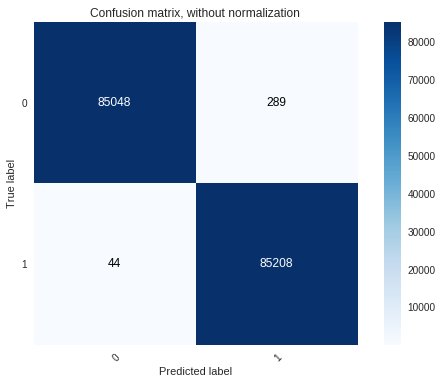

In [67]:
y_pred = model.predict(X_test)
plot_confusion_matrix(y_test.ravel(), y_pred.round().astype('int').ravel(), classes= y['Class'].unique())
plt.show()

Confusion matrix, without normalization
[[283451    864]
 [     3    489]]


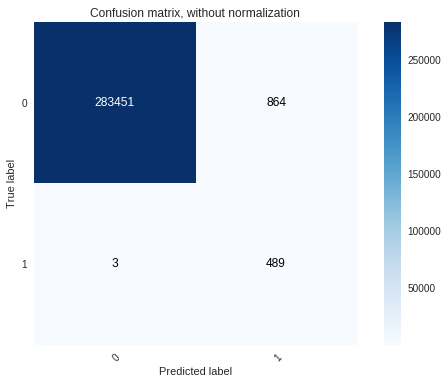

In [68]:
y_pred = model.predict(X)
plot_confusion_matrix(y['Class'].values.ravel(), y_pred.round().astype('int').ravel(), classes= y['Class'].unique())
plt.show()